# 泰坦尼克号生存预测

### 一、目标

### 对泰坦尼克号失事的乘客进行生还概率的预测分析

### 二、数据集字段（特征）

**PassengerId**——乘客ID

**Pclass**——乘客舱位等级

**Name**——乘客姓名

**Sex**——性别

**Age**——年龄

**SibSp**——堂兄弟/妹个数

**Parch**——父母与小孩个数

**Ticket**——船票信息

**Fare**——票价

**Cabin**——客舱

**Embarked**——登船港口

**Survived**——是否生还（0表示死亡，1表示存活）

### 三、数据探索

In [1]:
import pandas as pd
import numpy as np

**导入数据**

In [2]:
data_raw = pd.read_csv("./titanic/train.csv")
data_test = pd.read_csv("./titanic/test.csv")

*复制一份data_raw作为data_train，当要进行数据清洗时，对其进行，而不是对data_raw进行*

In [3]:
data_train = data_raw.copy(deep=True)

data_clean存储data_train和data_test，用于统一的数据清洗和编码

In [4]:
data_clean = [data_train, data_test]

**查看data_train，data_test的基本信息 (head(), tail(), sample(), info(), describe())**

In [5]:
data_train.head()  # 查看data_train的前5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.tail()  # 后5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
data_train.sample(5)  # 随机取样5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S


In [8]:
data_train.info()  # 查看字段类型、数量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_train.describe(include="all")
# 查看数据统计信息，窥探平均数，中位数，判断偏态分布，判断是否异常值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Zabour, Miss. Hileni",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
data_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
269,1161,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,NaN,S
259,1151,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S
290,1182,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S
273,1165,3,"Lennon, Miss. Mary",female,NaN,1,0,370371,15.5000,NaN,Q
191,1083,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
data_test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Lahtinen, Rev. William",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


**统计data_train，data_test缺失值数量**

In [15]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
print("训练集各特征缺失率：\n", data_train.isnull().sum()/data_train.shape[0])

训练集各特征缺失率：
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


可以看出Cabin的缺失率十分高！

In [19]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
print("测试集各特征的缺失率：\n", data_test.isnull().sum()/data_test.shape[0])

测试集各特征的缺失率：
 PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


同样地，测试集中Cabin特征缺失严重！

**查看存活信息**

In [21]:
data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
print("存活率：\n", data_train["Survived"].value_counts()/data_train.shape[0])

存活率：
 0    0.616162
1    0.383838
Name: Survived, dtype: float64


只有38.3%的人幸存，多数人死亡！

### 四、数据分析&数据可视化

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 显示中文

**查看每个特征的类型，前面有看过，这里再输出一次**

In [24]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**PassengerId, Survived, Pclass, SibSp, Parch——整数类型，离散数据**

**Name, Sex, Ticket, Cabin, Embarked——对象类型，离散数据**

**Age, Fare——浮点数类型，即连续数据**

首先对于PassengerId, Ticket这两类离散数据，代表一种序号信息，对预测生存应该没有作用，先将这两个特征drop掉

In [25]:
for dataset in data_clean:
    dataset.drop(columns=["PassengerId", "Ticket"], inplace=True)

In [26]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [27]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


其次，对于Cabin，缺失率太高，有两种选择：1.直接将该特征drop掉；2.将该特征的缺失值NaN也作为一个特征值。这里选择将该特征drop掉。

In [28]:
for dataset in data_clean:
    dataset.drop(columns=["Cabin"], inplace=True)

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [30]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


**接下来分析Embarked, Pclass, Sex对Survived的影响，因为它们的类型少**

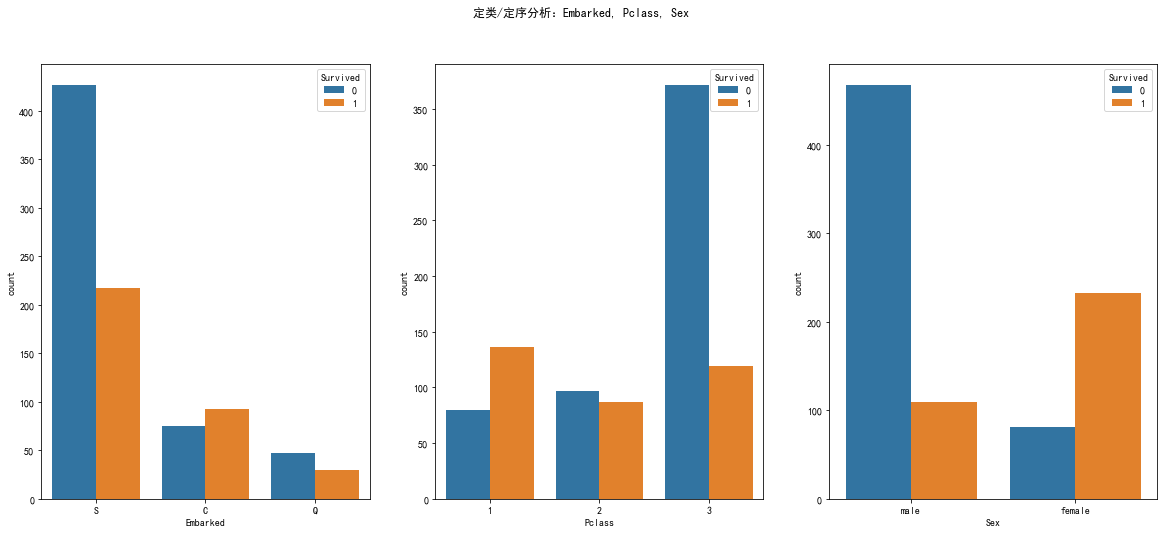

In [32]:
fig = plt.figure(figsize=(20, 8))
plt.suptitle("定类/定序分析：Embarked, Pclass, Sex")  # 大标题
plt.subplot(131)  
sns.countplot(x="Embarked", hue="Survived", data=data_train)
plt.subplot(132)
sns.countplot(x="Pclass", hue="Survived", data=data_train)
plt.subplot(133)
sns.countplot(x="Sex", hue="Survived", data=data_train)
plt.show()

In [33]:
data_train[["Embarked", "Survived"]].groupby(["Embarked"]).mean()  

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [35]:
data_train[["Pclass", "Survived"]].groupby(["Pclass"]).mean()  

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [36]:
data_train[["Sex", "Survived"]].groupby(["Sex"]).mean()  

,Survived
Sex,
female,0.742038
male,0.188908


上面的图表可以看出：
对于Embarked（港口），S港口人数最多，但获救率最低，C港口获救率最高。
对于Pclass（乘客等级），一等舱乘客的获救率最高，三等舱乘客的获救率最低，舱位应该和社会地位有关，地位高有钱的人坐一等舱，获救率更高
对于Sex，女性获救率明显高于男性，说明女士优先

**其次分析Parch, SibSp对Survived的影响**

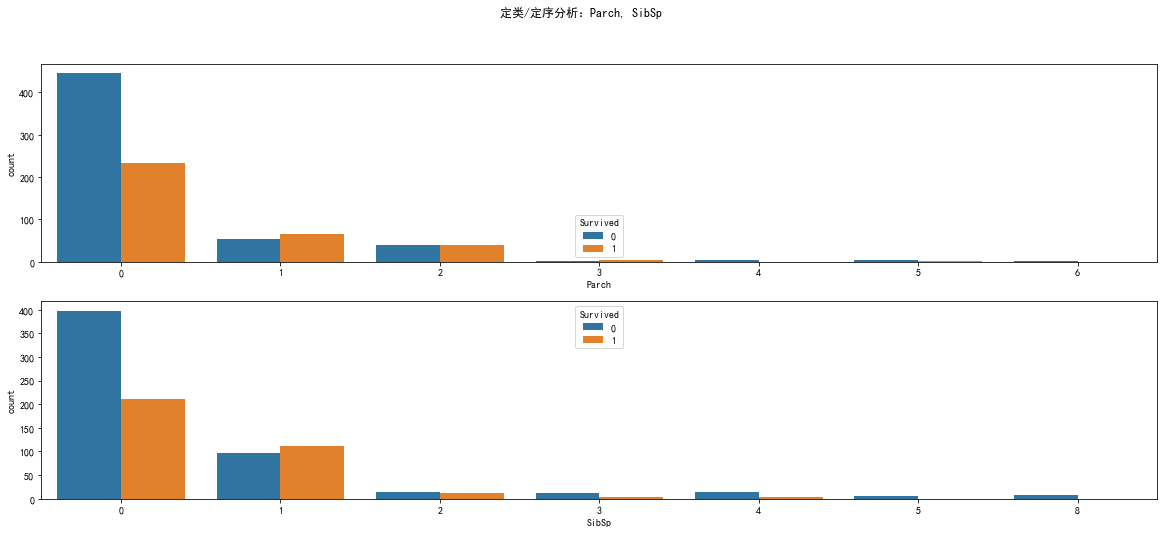

In [37]:
fig = plt.figure(figsize=(20, 8))
plt.suptitle("定类/定序分析：Parch, SibSp")
plt.subplot(211)
sns.countplot(x="Parch", hue="Survived", data=data_train)
plt.subplot(212)
sns.countplot(x="SibSp", hue="Survived", data=data_train)
plt.show()

In [38]:
data_train[["Parch", "Survived"]].groupby(["Parch"]).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [39]:
data_train[["SibSp", "Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


由上图表可以明显看出：
Parch=0的人数最多（单人旅行），但获救率低；对SibSp也类似，这两个特征可以合并起来。这里构建一个新特征Family = Parch + SibSp

In [40]:
for dataset in data_clean:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]

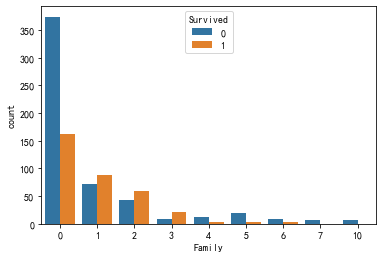

In [42]:
sns.countplot(x="Family", hue="Survived", data=data_train)

In [43]:
data_train[["Family", "Survived"]].groupby(["Family"]).mean()

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


由上述图表可以看出，Family=1, 2, 3的存活率明显高于其它。对于Family这个特征，还可以继续处理，如将Family划分两个区间，将Family=1,2,3划分为一个区间，其余的划进另一个区间，再分别对这两个区间编码。这里先不采用这个方法，直接保留Family这个特征。

**上面的分析是针对单个离散变量的，现对多个离散变量进行分析，分析其之间的关系**

分析不同Pclass, Sex, Embarked对Survived的影响，利用sns.FacetGrid

E:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


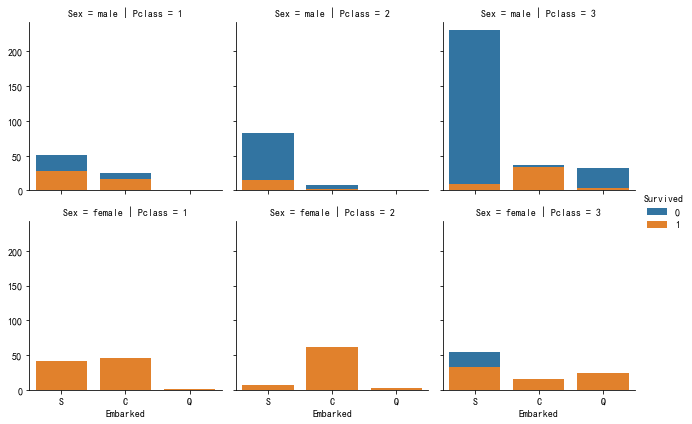

In [44]:
grid = sns.FacetGrid(data=data_train, row="Sex", col="Pclass", hue="Survived")
grid.map(sns.countplot, "Embarked")
grid.add_legend()

In [47]:
data_train[["Sex", "Pclass", "Embarked", "Survived"]].groupby(["Sex", "Pclass", "Embarked"]).mean()

Survived
Sex    Pclass Embarked          
female 1      C         0.976744
              Q         1.000000
              S         0.958333
       2      C         1.000000
              Q         1.000000
              S         0.910448
       3      C         0.652174
              Q         0.727273
              S         0.375000
male   1      C         0.404762
              Q         0.000000
              S         0.354430
       2      C         0.200000
              Q         0.000000
              S         0.154639
       3      C         0.232558
              Q         0.076923
              S         0.128302

In [48]:
data_train[["Sex", "Pclass", "Survived"]].groupby(["Sex", "Pclass"]).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [49]:
data_train[["Sex", "Embarked", "Survived"]].groupby(["Sex", "Embarked"]).mean()

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603

由上述图表可知：
对于女性，不管是Pclass=1,2,3，Embarked=S,C,Q，获救率都很高，细化来看，Pclass=1,2的女性基本全获救了。
对于男性，Pclass=1的获救率最高，其余Pclass的男性获救率较低。
不论男女，在C港口登船的获救率都是最高的，此外，对于Pclass=1,2的男女，在Q港口登船的人数十分少，男性更是如此。港口可能也和社会地位有关。

In [93]:
pd.crosstab([data_train["Pclass"], data_train["Sex"]], data_train["Embarked"])

Embarked        C   Q    S
Pclass Sex                
1      female  43   1   48
       male    42   1   79
2      female   7   2   67
       male    10   1   97
3      female  23  33   88
       male    43  39  265

In [90]:
pd.crosstab(data_train["Pclass"], data_train["Embarked"])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


可以明显看出，Pclass=1,2的人极少去Q港口登船的

**离散变量中剩余Name没有分析，现对Name进行分析**

In [50]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [51]:
data_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,0
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,0


In [52]:
data_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
712,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,52.0000,S,1
640,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,0
151,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,66.6000,S,1
103,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,8.6542,S,0
99,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,26.0000,S,1


可以看出，Name中有共同点，即Mrs. Mr. Miss.等，将这些用正则表达式提取出来作为新特征Title

In [55]:
for dataset in data_clean:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

In [57]:
data_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Mme           1
Jonkheer      1
Sir           1
Don           1
Ms            1
Capt          1
Lady          1
Name: Title, dtype: int64

可以看出，Mr, Miss, Mrs, Master最多

In [58]:
pd.crosstab(data_train["Title"], data_train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


对Title继续划分，划分为Mr, Miss, Mrs, Master，此外，将Mme划进Mrs，将Mlle, Ms划进Miss，剩余的都划进Rare

In [59]:
for dataset in data_clean:
    dataset["Title"] = dataset["Title"].replace(["Mme"], "Mrs")
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Ms"], "Miss")
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt",
                                                "Col", "Don", "Dr", "Major",
                                                "Rev", "Sir", "Jonkheer",
                                                "Dona"], "Rare")

In [61]:
data_train[["Title", "Survived"]].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


可以看出，Master, Miss, Mrs的存活率都较高，而Mr, Rare较低

**现对连续变量Age, Fare进行分析**

**对Age的分析**

E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
E:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
E:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


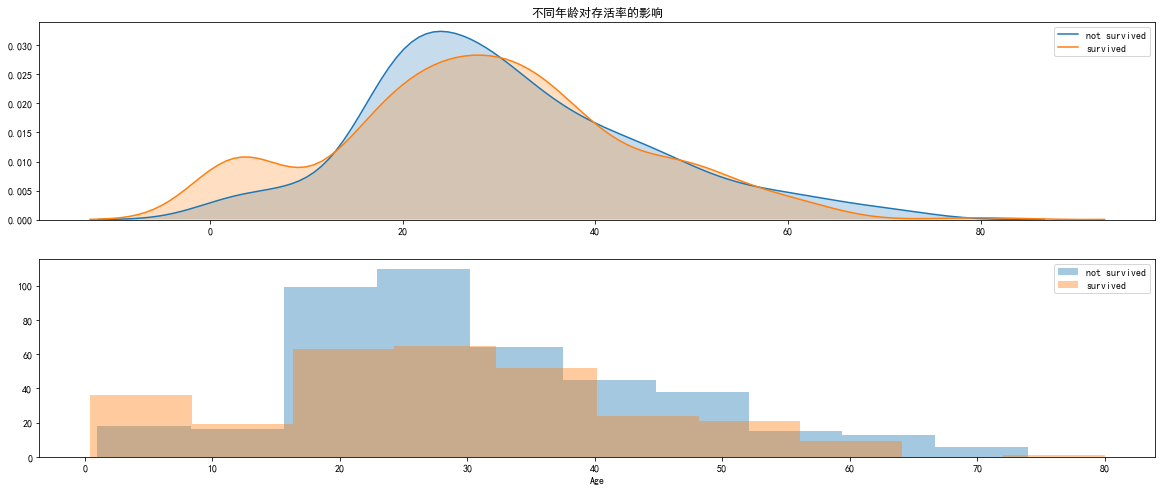

In [64]:
fig = plt.figure(figsize=(20, 8))
plt.subplot(211)
plt.title("不同年龄对存活率的影响")
sns.kdeplot(data=data_train.loc[data_train["Survived"]==0, "Age"], shade=True, label="not survived")
sns.kdeplot(data=data_train.loc[data_train["Survived"]==1, "Age"], shade=True, label="survived")
plt.subplot(212)
sns.distplot(data_train.loc[data_train["Survived"]==0, "Age"], bins=10, kde=False, label="not survived")
sns.distplot(data_train.loc[data_train["Survived"]==1, "Age"], bins=10, kde=False, label="survived")
plt.legend()
plt.show()

上图可以看出，0-15年龄段的获救率最高，其他的则不那么明显

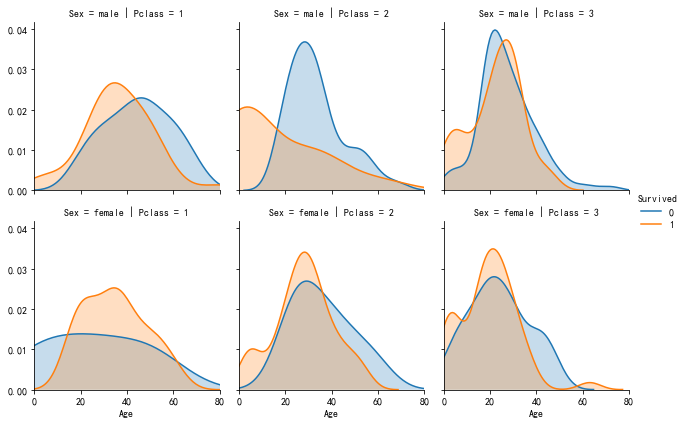

In [69]:
grid = sns.FacetGrid(data=data_train, row="Sex", col="Pclass", hue="Survived", xlim=[0,80])
grid.map(sns.kdeplot, "Age", shade=True)
grid.add_legend()

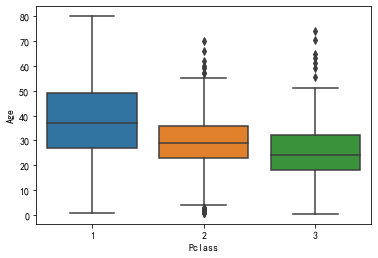

In [71]:
sns.boxplot(data=data_train, x="Pclass", y="Age")

上图可以看出，Pclass越高，年纪越大，这和我们的直觉是一样的，即成功人士往往年纪较大

**对Age进行分段分析，前面分析到0-15的存活率最大，年龄范围是0-80，因此这里可以分为5个区间**

In [72]:
for dataset in data_clean:
    dataset["AgeBand"] = pd.cut(dataset["Age"], bins=5)

In [78]:
data_train[["AgeBand", "Pclass", "Sex", "Survived"]].groupby(["AgeBand", "Pclass", "Sex"]).mean()

Survived
AgeBand          Pclass Sex             
(0.34, 16.336]   1      female  0.833333
                        male    1.000000
                 2      female  1.000000
                        male    0.818182
                 3      female  0.545455
                        male    0.270270
(16.336, 32.252] 1      female  0.968750
                        male    0.444444
                 2      female  0.916667
                        male    0.062500
                 3      female  0.461538
                        male    0.165563
(32.252, 48.168] 1      female  1.000000
                        male    0.435897
                 2      female  0.909091
                        male    0.074074
                 3      female  0.250000
                        male    0.055556
(48.168, 64.084] 1      female  0.941176
                        male    0.269231
                 2      female  0.833333
                        male    0.090909
                 3      female  1.000000
                        male    0.000000
(64.084, 80.0]   1      female       NaN
                        male    0.166667
                 2      female       NaN
                        male    0.000000
                 3      female       NaN
                        male    0.000000

可以看出，不论男女，在(0.34, 16.336]的存活率都较高

**现对Fare进行分析**

首先看Fare与存活率的关系

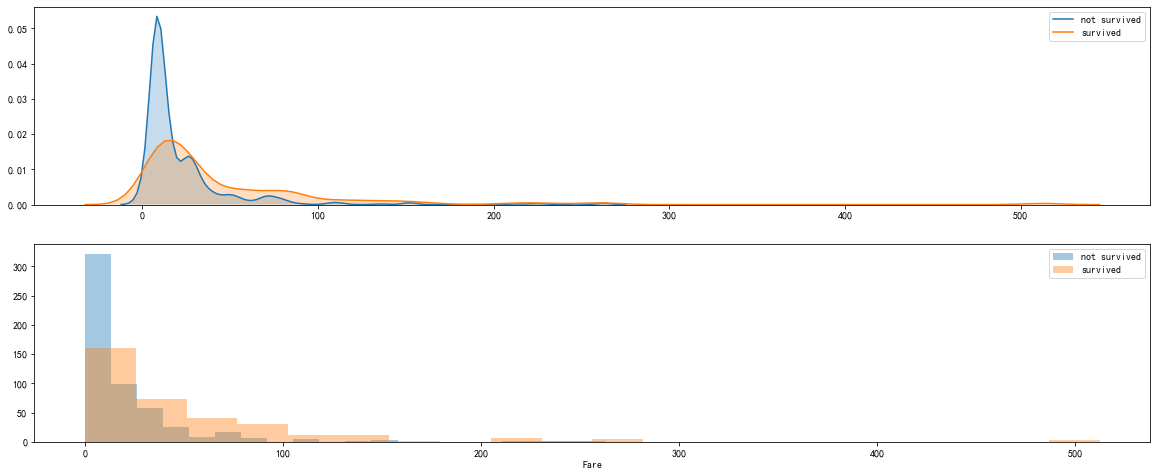

In [80]:
figure = plt.figure(figsize=(20, 8))
plt.title("不同Fare下的存活率")
plt.subplot(211)
sns.kdeplot(data_train.loc[data_train["Survived"]==0, "Fare"], shade=True, label="not survived")
sns.kdeplot(data_train.loc[data_train["Survived"]==1, "Fare"], shade=True, label="survived")
plt.subplot(212)
sns.distplot(data_train.loc[data_train["Survived"]==0, "Fare"], bins=20, label="not survived", kde=False)
sns.distplot(data_train.loc[data_train["Survived"]==1, "Fare"], bins=20, label="survived", kde=False)
plt.legend()
plt.show()

可以明显地看出，低票价的存活率低，票价越高，存活率越高

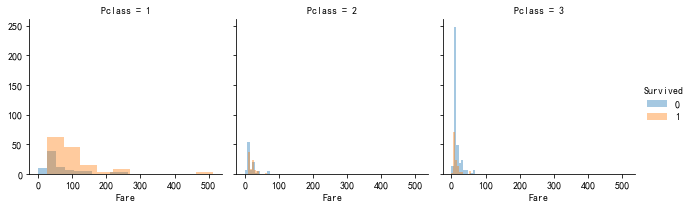

In [83]:
grid = sns.FacetGrid(data=data_train, col="Pclass", hue="Survived")
grid.map(sns.distplot, "Fare", kde=False, bins=10)
grid.add_legend()

上图可以看出Pclass越高，高票价越多，存活率越高

**对Fare划分区间，利用四分位数来划分，因为Fare的分布不是标准的正态分布，而是偏态**

In [84]:
for dataset in data_clean:
    dataset["FareBand"] = pd.qcut(data_train["Fare"], 4)

In [85]:
pd.crosstab(data_train["FareBand"], data_train["Pclass"])

Pclass,1,2,3
FareBand,,,
"(-0.001, 7.91]",6,6,211
"(7.91, 14.454]",0,86,138
"(14.454, 31.0]",51,70,101
"(31.0, 512.329]",159,22,41


很明显，Pclass越高，高票价人数越大

In [86]:
data_train[["FareBand", "Survived"]].groupby(["FareBand"]).mean()

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


票价越高，存活率越大；票价越高，越有可能是Pclass 1，存活率越大

### 五、数据清洗

In [94]:
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Family        0
Title         0
AgeBand     177
FareBand      0
dtype: int64

In [95]:
data_test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Family       0
Title        0
AgeBand     86
FareBand     0
dtype: int64

**目前，Embarked, Fare, Age都有缺失**

对Embarked的填充，有两种：1. 根据众数来填充 2. 根据特征相似的样本的Embarked来填充，比如找Pclass和Sex与缺失样本一样的Embarked来填充。这里采用1

In [96]:
for dataset in data_clean:
    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace=True)

In [97]:
data_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Family        0
Title         0
AgeBand     177
FareBand      0
dtype: int64

对Fare的填充，有两种：1. 采用中位数来填充，注意到Fare的分布是偏态分布，不合适用平均值来填充 2. 根据特征相似样本的Fare的中位数来填充。这里采用1

**注意：填充完以后要对Fare重新划分区间，之前没有对Fare填充缺失值就先划分了区间，这时需要再划分一次**

In [98]:
for dataset in data_clean:
    dataset["Fare"].fillna(dataset["Fare"].median(), inplace=True)
    dataset["FareBand"] = pd.qcut(dataset["Fare"], 4)

In [99]:
data_test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
Family       0
Title        0
AgeBand     86
FareBand     0
dtype: int64

对Age的填充，同样有两种：1. 中位数填充，Age的分布也是偏态分布 2. 用特征相似的样本的Age的中位数来填充。这里采用1

**注意：填充完以后要对Age重新划分区间，之前没有对Age填充缺失值就先划分了区间，这时需要再划分一次**

In [100]:
for dataset in data_clean:
    dataset["Age"].fillna(dataset["Age"].median(), inplace=True)
    dataset["AgeBand"] = pd.cut(dataset["Age"], 5)

In [101]:
data_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Family      0
Title       0
AgeBand     0
FareBand    0
dtype: int64

In [102]:
data_test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Family      0
Title       0
AgeBand     0
FareBand    0
dtype: int64

### 六、编码

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Family      891 non-null int64
Title       891 non-null object
AgeBand     891 non-null category
FareBand    891 non-null category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 78.9+ KB


**需要编码的字段有Sex，Embarked，Title，AgeBand，FareBand**

In [106]:
label = LabelEncoder()
for dataset in data_clean:
    dataset["Sex_Code"] = label.fit_transform(dataset["Sex"])
    dataset["Embarked_Code"] = label.fit_transform(dataset["Embarked"])
    dataset["Title_Code"] = label.fit_transform(dataset["Title"])
    dataset["AgeBand_Code"] = label.fit_transform(dataset["AgeBand"])
    dataset["FareBand_Code"] = label.fit_transform(dataset["FareBand"])

In [108]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
Family           891 non-null int64
Title            891 non-null object
AgeBand          891 non-null category
FareBand         891 non-null category
Sex_Code         891 non-null int32
Embarked_Code    891 non-null int32
Title_Code       891 non-null int32
AgeBand_Code     891 non-null int32
FareBand_Code    891 non-null int32
dtypes: category(2), float64(2), int32(5), int64(5), object(4)
memory usage: 96.3+ KB


### 七、提取X_train, y_train, X_test 

In [109]:
calc_columns = ["Pclass", "Family", "Sex_Code", "Embarked_Code", "Title_Code",
               "AgeBand_Code", "FareBand_Code"]

In [110]:
X_train = data_train[calc_columns]
y_train = data_train["Survived"]
X_test = data_test[calc_columns]

In [111]:
X_train.columns

Index(['Pclass', 'Family', 'Sex_Code', 'Embarked_Code', 'Title_Code',
       'AgeBand_Code', 'FareBand_Code'],
      dtype='object')

E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


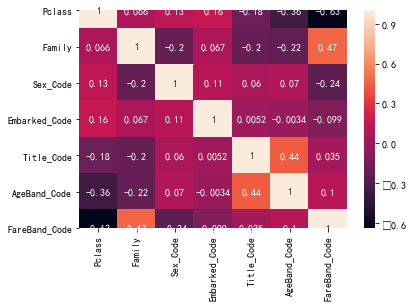

In [112]:
sns.heatmap(X_train.corr(), annot=True)

### 八、构建模型

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split, ShuffleSplit, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [114]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
lr = LogisticRegression()
p = Perceptron()
ls = LinearSVC()
s = SVC(probability=True)
gnb = GaussianNB()
mnb = MultinomialNB()
knc = KNeighborsClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier()

In [115]:
clf_list = [dtc, rfc, abc, gbc, lr, p, ls, s, gnb, mnb, knc, mlpc, xgb]

In [116]:
clf_compare = pd.DataFrame(columns=["name", "params", "mean_test_score", "test_score 3*sigma", "mean_train_score", "mean_fit_time"])
cv_splits = ShuffleSplit(n_splits=10, train_size=0.7, test_size=0.3, random_state=42)
row_index = 0
for clf in clf_list:
    clf_name = clf.__class__.__name__
    clf_compare.loc[row_index, "name"] = clf_name
    clf_compare.loc[row_index, "params"] = str(clf.get_params())
    cv_results = cross_validate(clf, X_train, y_train, cv=cv_splits, return_train_score=True)
    clf_compare.loc[row_index, "mean_test_score"] = np.mean(cv_results["test_score"])
    clf_compare.loc[row_index, "test_score 3*sigma"] = 3*np.std(cv_results["test_score"])
    clf_compare.loc[row_index, "mean_train_score"] = np.mean(cv_results["train_score"])
    clf_compare.loc[row_index, "mean_fit_time"] = np.mean(cv_results["fit_time"])
    row_index += 1;

E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

In [117]:
clf_compare

,name,params,mean_test_score,test_score 3*sigma,mean_train_score,mean_fit_time
0,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.815299,0.0756322,0.893419,0.00649552
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.819403,0.0729246,0.889406,0.0367773
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.816045,0.0515533,0.819101,0.0810959
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.823881,0.0600317,0.8626,0.0806928
4,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.783955,0.0242422,0.789567,0.00468762
5,Perceptron,"{'alpha': 0.0001, 'class_weight': None, 'early...",0.707836,0.325592,0.702408,0
6,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.78694,0.0280745,0.789567,0.0626321
7,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.833209,0.0573086,0.834029,0.060446
8,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.798507,0.0493046,0.792777,0.0032984
9,MultinomialNB,"{'alpha': 1.0, 'class_prior': None, 'fit_prior...",0.704851,0.0465462,0.715409,0.00319791


**可以看出SVC的测试准确率最高**

In [118]:
s.fit(X_train, y_train)
y_test = s.predict(X_test)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [120]:
test_data = pd.read_csv("./titanic/test.csv")
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('./titanic/submission.csv', index=False)

### 九、调参

In [121]:
param_grids = [
    {"criterion": ["gini", "entropy"], 
     "splitter": ["best", "random"],
    "max_depth": [3, 4, 5, 6, 7],
    "max_features": ["sqrt", "log2"]},  # DecisionTreeClassifier
    {"n_estimators": [50, 100, 150, 200, 250, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, 6, 7],
    "max_features": ["sqrt", "log2"]},  # RandomForest
    {"n_estimators": [50, 100, 150, 200, 250, 300],
    "learning_rate": [0.01, 0.03, 0.1, 0.3],
    "algorithm": ["SAMME", "SAMME.R"]},  # AdaBoost
    {"loss": ["deviance", "exponential"],
    "learning_rate": [0.01, 0.03, 0.1, 0.3],
    "n_estimators": [50, 100, 150, 200, 250, 300],
    "subsample": [0.1, 0.3, 0.5, 0.7, 1.0],
    "max_features": ["sqrt", "log2"]},  # GradientBoost
    {"penalty": ["l2"],
    "tol": [0.01, 0.001, 0.0001, 0.00001],
    "C": [0.3, 0.7, 1.0, 1.3, 1.7],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 300, 500]},  # Logistic
    {"penalty": ["l2", "l1"],
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
    "max_iter": [300,500, 700, 1000, 2000],
    "tol": [0.01, 0.001, 0.0001]},  # Perceptron
    {"penalty": ["l2"],
    "loss": ["hinge", "squared_hinge"],
    "tol": [0.01, 0.001, 0.0001],
    "C": [0.01, 0.03, 0.1, 0.3, 1, 3]},  # LinearSVC
    {"C": [0.01, 0.03, 0.1, 0.3, 1, 3],
    "kernel": ["rbf", "poly", "sigmoid"],
    "tol": [0.01, 0.001, 0.0001]},  # SVC
    {"var_smoothing": [1e-7, 1e-8, 1e-9]},  # GaussianNB
    {"alpha": [0, 0.3, 1.0, 1.3]},  # MultinomialNB
    {"n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree"],
    "p": [1, 2]},  # KNN
    {"hidden_layer_sizes": [(50,), (100,), (150,), (200,)],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "solver": ["lbfgs", "sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "max_iter": [200, 300, 400, 500]},  # NeuralNetwork
    {"max_depth": [3, 5, 7, 9],
    "learning_rate": [0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
    "booster": ["gbtree", "gblinear", "dart"]}  # XGBoost
]

In [122]:
gridsearch_compare = pd.DataFrame(columns=["name", "mean_train_score", "mean_test_score", "std_test_score*3", "best_params"])
row_index = 0
for clf, param_grid in zip(clf_list, param_grids):
    print(row_index)
    grid_clf = GridSearchCV(clf, param_grid, cv=cv_splits, n_jobs=-1, return_train_score=True)
    #grid_clf = RandomizedSearchCV(clf, param_grid, cv=cv_splits, n_jobs=-1, return_train_score=True, random_state=42, n_iter=30)
    grid_clf.fit(X_train, y_train)
    gridsearch_compare.loc[row_index, "name"] = clf.__class__.__name__
    cv_results = grid_clf.cv_results_
    gridsearch_compare.loc[row_index, "mean_train_score"] = np.mean(cv_results["mean_train_score"])
    gridsearch_compare.loc[row_index, "mean_test_score"] = np.mean(cv_results["mean_test_score"])
    gridsearch_compare.loc[row_index, "std_test_score*3"] = np.mean(cv_results["std_test_score"])*3
    gridsearch_compare.loc[row_index, "best_params"] = str(grid_clf.best_params_)
    row_index += 1

0
1
2
3
4
5
6
7


E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


8
9


E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


10
11


E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


12


In [123]:
gridsearch_compare

,name,mean_train_score,mean_test_score,std_test_score*3,best_params
0,DecisionTreeClassifier,0.807909,0.792752,0.099503,"{'criterion': 'entropy', 'max_depth': 7, 'max_..."
1,RandomForestClassifier,0.84662,0.829876,0.0629479,"{'criterion': 'gini', 'max_depth': 5, 'max_fea..."
2,AdaBoostClassifier,0.808852,0.812648,0.0492202,"{'algorithm': 'SAMME.R', 'learning_rate': 0.1,..."
3,GradientBoostingClassifier,0.841209,0.81762,0.0704187,"{'learning_rate': 0.01, 'loss': 'exponential',..."
4,LogisticRegression,0.78945,0.785886,0.0351244,"{'C': 0.3, 'max_iter': 100, 'penalty': 'l2', '..."
5,Perceptron,0.668732,0.66658,0.210356,"{'alpha': 0.001, 'max_iter': 300, 'penalty': '..."
6,LinearSVC,0.784051,0.783841,0.0393233,"{'C': 0.03, 'loss': 'hinge', 'penalty': 'l2', ..."
7,SVC,0.729442,0.723425,0.0897,"{'C': 0.1, 'kernel': 'poly', 'tol': 0.01}"
8,GaussianNB,0.792777,0.798507,0.0493046,{'var_smoothing': 1e-07}
9,MultinomialNB,0.71549,0.704851,0.0465462,{'alpha': 0}


**如果用最好的分类器，那由表可知RandomForest最好，参数设置在best_params中，可用该参数的RandomForest来拟合预测。**

**利用VotingClassifier来构建更强的分类器**

In [140]:
voting_clf = [
    ("decisiontree", DecisionTreeClassifier(criterion="entropy", max_depth=7, max_features="log2", splitter="best")),
    ("randomforest", RandomForestClassifier(criterion="gini", max_depth=5, max_features="log2", n_estimators=50)),
    ("adaboost", AdaBoostClassifier(algorithm="SAMME.R", learning_rate=0.1, n_estimators=100)),
    ("gradientboost", GradientBoostingClassifier(learning_rate=0.01, loss="exponential", max_features="sqrt", n_estimators=250, subsample=1.0)),
    ("logistic", LogisticRegression(C=0.3, max_iter=100, penalty="l2", solver="lbfgs", tol=0.01)),
    ("linearsvc", LinearSVC(C=0.03, loss="hinge", penalty="l2", tol=0.01)),
    ("svc", SVC(C=0.1, kernel="poly", tol=0.01)),
    ("gaussian", GaussianNB(var_smoothing=1e-07)),
    ("multinomial", MultinomialNB(alpha=0)),
    ("knn", KNeighborsClassifier(algorithm="ball_tree", n_neighbors=7, p=1, weights="uniform")),
    ("mlp", MLPClassifier(activation="relu", alpha=0.01, hidden_layer_sizes=(50,), max_iter=300, solver="adam")),
    ("xgb", XGBClassifier(booster="gbtree", learning_rate=0.03, max_depth=3))
]
voting = VotingClassifier(voting_clf)

In [141]:
voting_cv_results = cross_validate(voting, X_train, y_train, cv=cv_splits, return_train_score=True)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Fu

In [143]:
voting_cv_results

{'fit_time': array([1.30519176, 1.27760386, 1.27121425, 1.53324866, 1.28551054,
        1.28420639, 1.55535507, 1.28954101, 1.33639932, 1.30239964]),
 'score_time': array([0.08494639, 0.08294892, 0.08294821, 0.08294821, 0.08294916,
        0.08194876, 0.081949  , 0.08294845, 0.08294868, 0.08294821]),
 'test_score': array([0.8358209 , 0.84701493, 0.84701493, 0.81343284, 0.83955224,
        0.8358209 , 0.82462687, 0.79477612, 0.85820896, 0.84701493]),
 'train_score': array([0.84911717, 0.83306581, 0.82985554, 0.84751204, 0.83627608,
        0.83467095, 0.84430177, 0.85874799, 0.82504013, 0.83146067])}

In [144]:
np.mean(voting_cv_results["test_score"])

0.8343283582089551

In [145]:
voting.fit(X_train, y_train)
y_test = voting.predict(X_test)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
E:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [146]:
test_data = pd.read_csv("./titanic/test.csv")
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('./titanic/submission.csv', index=False)
# 20200225 提交准确率：0.80382

### 十、总结 

2020/02/25 目前的最高准确率是0.80382，Top 8%，还可以继续加强，从特征工程方面继续着手，比如对Family是否继续划分并编码等，对缺失值的更精细化填充是否更好？